### 선형으로 분리되는 데이타 실습하기

In [11]:
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

#### Custom Funtion Definition

In [12]:
red_RGB = (1, 0, 0)
blue_RGB = (0, 0, 1)
data_colors = [red_RGB, blue_RGB]

def read_points_file(filename):
    points = []
    with open(filename, "r") as f:
        for point in f:
            point = point.strip("\n").split()
            points.append([float(point[0]), float(point[1])])
    return points

def read_data(class_0_file, class_1_file):
    points_label0 = read_points_file(class_0_file)
    points_label1 = read_points_file(class_1_file)
    points = points_label0 + points_label1
    points = np.array(points)
    
    label0, label1 = [0], [1]
    num_of_label0, num_of_label1 = len(points_label0), len(points_label1)
    labels = label0 * num_of_label0 + label1 * num_of_label1
    
    return (points, labels)



def get_colors(y):
    return [data_colors[label] for label in y]

def plot_data(X_train, y_train, X_test, y_test):
  
    X = np.concatenate((X_train, X_test)) #concatenate 배열을 하나로 합침
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)

    plt.figure(figsize=(8, 4))

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    plt.title("Data (100%)")


    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_train[:, 0], X_train[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_test[:, 0], X_test[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()
    plt.show()

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()

def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):

    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')

    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    ax = plt.gca()  ## get current axes
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)   ## ravel()은 flatten() 함수
    Z = clf.decision_function(xy).reshape(XX.shape)
    # clf.decision_function(xy).shape = (900,)
    # Z.shape = (30, 30)

    if  show_only_decision_function:
    # Plot decision boundary
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                 linestyles=['-'])
    else :
    # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])

#### 1. DataLoader

In [13]:
'''
SVM 알고리즘을 실습하기 위해서 
노이즈(Noise) 전혀 없는 깔끔하게 선형구분이 가능한 점들의 데이터
'''
X, labels = read_data('../data/points_class_0.txt','../data/points_class_1.txt')

#### 2. Data Split

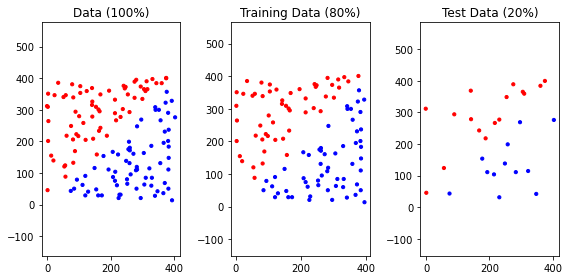

In [17]:
#Split data to train and test on 80-20 ratio
'''
sklearn 의 경우 해당 labels 데이터와 같이 섞여있지 않고 깔끔하게 정렬되어 있다.
이러한 정렬된 데이터는 ML이 학습이 아닌 외워버리기 때문에 반드시 섞어줄 필요가 있다

1) 데이터 섞기...랜덤하게 원래 들어있는 데이터를 섞는 기능
2) train data | test data를 잘 나눈다.
3) sklearn.model_selection 모듈의 import train_test_split() 함수를 사용
'''
# 할당받는 변수는 반드시 아래와 동일한 순서로 받아줘야 한다.
# .random_state=0 => seed 설정과 똑같다.
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0) 
# print(y_train)
# print('*'*30)
# print(y_test)

# Plot Data
plot_data(X_train, y_train, X_test, y_test)

#### 3. Model Generator and Training

In [18]:
clf = svm.SVC(kernel='linear') # 선형으로 단순하게 분리...모델 생성
clf.fit(X_train, y_train)

SVC(kernel='linear')

#### 4. Predict and Accuracy Score

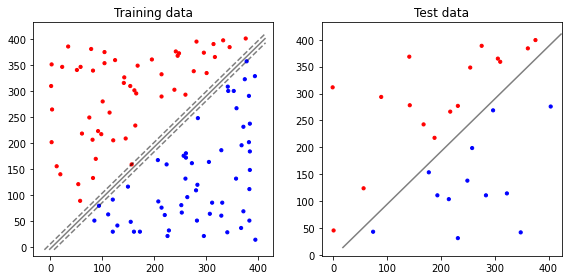

[0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0]
******************************
[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]


In [23]:
# Train(학습)이 잘 되었는지를 확인하려면 Test 데이터를 집어넣어서 예측해보여야 한다.
# predict()

clf_predict=clf.predict(X_test)

plot_decision_function(X_train, y_train, X_test, y_test, clf)

print(clf_predict)
print('*'*30)
print(y_test)

### 선형으로 분리되지 않는 데이터 실습하기

Noise 가 많이 끼어있는 데이터  
이럴때는 Cost 파라미터값을 사용해서 Decision Boundary(결정선)를 조절할 수 있습니다.

### 1. Data Loader

In [25]:
X, labels = read_data("../data/points_class_0_nonLinear.txt","../data/points_class_1_nonLinear.txt")

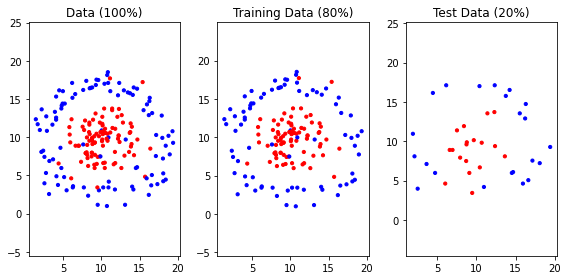

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)

plot_data(X_train, y_train, X_test, y_test)
# 가우시안 방사함수

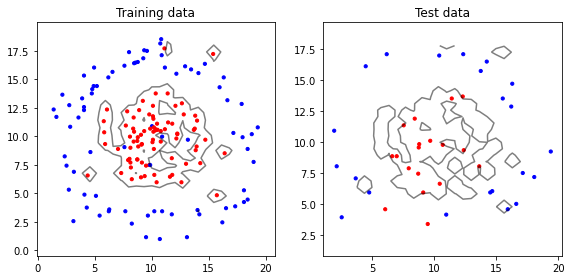

In [36]:
'''
위 그래프에서 보여지는 데이터인 경우
선형으로 분리되지 않고 빨간점 지점의 차원을 높여서 분리시켜야 한다.
이럴때 가우시안 방사 기저함수를 사용한다.
kernel='linear' | kernel='rbf' => 차원을 높여서 알아서 그룹핑을 해줌.
'''
# 최적의 cost, gamma 값을 찾기위해 여러 값을 넣는 작업 => grid search
# clf=svm.SVC(C=10.0, kernel='rbf', gamma=0.1)
clf=svm.SVC(C=1.0, kernel='rbf', gamma=10.0)


clf.fit(X_train, y_train)
predict = clf.predict(X_test)

plot_decision_function(X_train, y_train, X_test, y_test, clf)

#### Processing
1. Module Configuration
2. Data Loader
3. Data Split...train_test_split()
4. Model Generator
5. Training...fit()
6. Predict...predict()


### GridSearchCV

GridSearchCV  
cost, gamma 같은 변수에 지정될 수 있는 여러개의 값들을  
그리드한 모양으로 다 Search해 보겠다는 의미이다.  

교차검증을 통해서 최적의 파라미터를 찾는다.

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


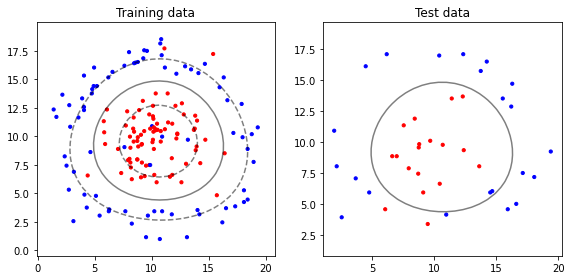

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 10, 100],'gamma':[1, 0.1, 0.01, 0.001, 10]}
clf_grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, verbose=1) # verbose :설명 출력

clf_grid.fit(X_train, y_train)
# n_jobs=1 => cpu 코어 갯수 지정

plot_decision_function(X_train, y_train, X_test, y_test, clf_grid)

위의 grid search 작업이 완료되면 궁금한 것이 생긴다.  
최적의 cost, gamma값은 무엇일까?

In [41]:
# 최적의 parameter 값들을 알아보겠다.
print("Best Parameters : \n", clf_grid.best_params_)
print("Best Estimators : \n", clf_grid.best_estimator_) # 모델 이름까지 포함

Best Parameters : 
 {'C': 1, 'gamma': 0.01}
Best Estimators : 
 SVC(C=1, gamma=0.01)
